In [37]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
    
nums = {'Student Name': [ "amit", 'Shivansh', 'Ishdeep',  
                         'Siddharth', "np.nan", 'Prakhar',
                         'Yash', 'Srikar', 'Kaustubh', 
                         'Aditya',  'Manav', "np.nan"],
        'Roll No.': [ 20, 30, 50, 5000, 100, 
                     3, 70, 30, 1000, 3500,
                     2, 5],
       "Location": [0,1,0,1,0,1,0,1,0,1,0,1]
        
    
       }
  

In [53]:
# Create the dataframe
data = pd.DataFrame(nums)
  
    
data

,Student Name,Roll No.,Location
0,amit,20,0
1,Shivansh,30,1
2,Ishdeep,50,0
3,Siddharth,5000,1
4,np.nan,100,0
5,Prakhar,3,1
6,Yash,70,0
7,Srikar,30,1
8,Kaustubh,1000,0
9,Aditya,3500,1


In [54]:
def detectoutliers(column):
    
    numbers = sorted(column)
    
    #outliers=[]
    
    Q1 = np.quantile(column, .25) #quantile() method calculates the quantile of the values in a given axis
    Q3 = np.quantile(column, .75) #Compute the q-th percentile of the data along the specified axis.
    Q2 = np.quantile(column, .50) 
    
    
    #print('Q1,Q3 : ',Q1,Q3)
    
    
    IQR = Q3-Q1
    lower_bound_val = Q1 -(1.5 * IQR) 
    upper_bound_val = Q3 +(1.5 * IQR) 
    
   
    
   # no_outliers = column[(Q1 - 1.5*IQR < column) &  (column < Q3 + 1.5*IQR)]
    
    no_outliers = column[(column > Q1 - 1.5*IQR) &  (column < Q3 + 1.5*IQR)]
    
    #outliers = column [(Q1 - 1.5*IQR >= column) |  (column >= Q3 + 1.5*IQR)] # or
    
    outliers = column [(column < 1 - 1.5*IQR) |  (column > Q3 + 1.5*IQR)]
    
    lower_fence_otlier=column [(Q1 - 1.5*IQR >= column)]
    
    upper_fence_otlier=column [(column >= Q3 + 1.5*IQR)]
    
    
    
    
    print("Quantile-1 (Q1): ",Q1, "\n")
    print("Quantile-2-median (Q2): ",Q2, "\n")
    print("Quantile-3 (Q3): ",Q3, "\n")
    print("Inter Quantile Range (IQR): ",IQR, "\n")
    
    print('lowerBound : ',lower_bound_val,"\n")
    print('upperBound : ',upper_bound_val,"\n")
    
    print("Sorted Column values: ",numbers,"\n")
    
    print('Detection Success',"\n")
    
    print('No_outliers : ',sorted(no_outliers),"\n")
    
    #print('Outliers : ',sorted(outliers),"\n")
    
    print('lower_fence_otlier : ',sorted(lower_fence_otlier),"\n")
    
    print('upper_fence_otlier : ',sorted(upper_fence_otlier),"\n")
    
    
    print('Length lower_fence_otlier : ',len(lower_fence_otlier),"\n")
    
    print('Length upper_fence_otlier : ',len(upper_fence_otlier),"\n")
    
    #print('Outliers : ',outliers,"\n")
    
    print('Length Outliers : ',len(outliers),"\n")
    
    
    return lower_bound_val,upper_bound_val #,outliers

In [55]:
detectoutliers(data["Roll No."])

Quantile-1 (Q1):  16.25 

Quantile-2-median (Q2):  40.0 

Quantile-3 (Q3):  325.0 

Inter Quantile Range (IQR):  308.75 

lowerBound :  -446.875 

upperBound :  788.125 

Sorted Column values:  [2, 3, 5, 20, 30, 30, 50, 70, 100, 1000, 3500, 5000] 

Detection Success 

No_outliers :  [2, 3, 5, 20, 30, 30, 50, 70, 100] 

lower_fence_otlier :  [] 

upper_fence_otlier :  [1000, 3500, 5000] 

Length lower_fence_otlier :  0 

Length upper_fence_otlier :  3 

Length Outliers :  3 



(-446.875, 788.125)

In [56]:
def Box_plot(df):
    plt.figure(figsize=(10,4))
    plt.title("Box plot")
    sns.boxplot(df)
    plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


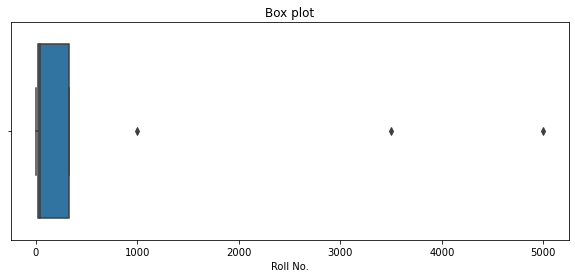

In [57]:
Box_plot(data["Roll No."])

In [58]:
def outlier_detect(df):    
    for i in df.describe().columns:
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR=Q3 - Q1
            LBV=Q1 - 1.5 * IQR
            UBV=Q3 + 1.5 * IQR
            
            x=np.array(df[i])
            p=[]
            
            for j in x:
                
                if j < LBV or j>UBV:
                    
                    p.append(df[i].median())
                    
                else:
                    p.append(j)
            df[i]=p
            return df

In [59]:
outlier_detect(data)

,Student Name,Roll No.,Location
0,amit,20.0,0
1,Shivansh,30.0,1
2,Ishdeep,50.0,0
3,Siddharth,40.0,1
4,np.nan,100.0,0
5,Prakhar,3.0,1
6,Yash,70.0,0
7,Srikar,30.0,1
8,Kaustubh,40.0,0
9,Aditya,40.0,1


In [60]:
data["Roll No."].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0      20.0
1      30.0
2      50.0
3      40.0
4     100.0
5       3.0
6      70.0
7      30.0
8      40.0
9      40.0
10      2.0
11      5.0
Name: Roll No., dtype: float64>

In [99]:
nums = {'Student Name': [ "amit", 'Shivansh', 'Ishdeep',  
                         'Siddharth', "np.nan", 'Prakhar',
                         'Yash', 'Srikar', 'Kaustubh', 
                         'Aditya',  'Manav', "np.nan"],
        'Roll No.': [ 20, 30, 50, 500, 100, 
                     3, 70, 30, 1000, 500,
                     2, 5],
       "Location": [0,1,0,1,0,1,0,1,0,1,0,1],
        'outlier': [ 20, 3000, 500, 50, 100, 
                     3, 70, 7, 1000, 500,
                     2, 5],
        
       }
  
# Create the dataframe
df = pd.DataFrame(nums)
  
    
df

,Student Name,Roll No.,Location,outlier
0,amit,20,0,20
1,Shivansh,30,1,3000
2,Ishdeep,50,0,500
3,Siddharth,500,1,50
4,np.nan,100,0,100
5,Prakhar,3,1,3
6,Yash,70,0,70
7,Srikar,30,1,7
8,Kaustubh,1000,0,1000
9,Aditya,500,1,500


In [109]:
 def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

In [110]:
mod_outlier(df)

,Student Name,Roll No.,Location,outlier
0,amit,20,0,20
1,Shivansh,30,1,1240
2,Ishdeep,50,0,500
3,Siddharth,460,1,50
4,np.nan,100,0,100
5,Prakhar,3,1,3
6,Yash,70,0,70
7,Srikar,30,1,7
8,Kaustubh,460,0,1000
9,Aditya,460,1,500


In [102]:
df.columns

Index(['Student Name', 'Roll No.', 'Location', 'outlier'], dtype='object')

In [111]:
np.median(df["Roll No."])

40.0